## Thursday, July 22, 2020

## Logistic regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score as CVS, LeaveOneOut, KFold
from sklearn.metrics import roc_curve, plot_roc_curve, accuracy_score, make_scorer

In [2]:
data = pd.read_csv("datasets/covid19_list.csv", usecols = ["age", "death"])
data.dropna(inplace = True)
data

,age,death
0,66.0,0
1,56.0,0
2,46.0,0
3,60.0,0
4,58.0,0
...,...,...
1052,45.0,0
1079,24.0,0
1080,24.0,0
1081,35.0,0


In [3]:
age_list = np.array(data["age"])
death_list = np.array(data["death"])
death_list = np.array([1 if x!='0' else 0 for x in np.array(data["death"])])

# see how it looks like
age_list[100:200], death_list[100:200], len(age_list), len(death_list)

(array([79., 55., 87., 66., 58., 66., 78., 67., 65., 58., 67., 82., 49.,
         2., 59., 57., 68., 40., 46., 56., 29., 29., 57., 30., 33., 20.,
        24., 28., 41., 46., 45.,  9., 40., 28., 27., 15., 42., 24., 32.,
        34., 63., 58., 49., 33., 55., 79., 19., 58., 39., 21., 30., 64.,
        44., 70., 52., 32., 33., 71., 31., 48., 19., 68., 71., 35.,  4.,
        38., 69., 50., 78., 49., 34., 55., 36., 65., 38., 36., 18., 50.,
        40., 63., 47., 42., 48., 39., 41., 31., 27., 28., 51., 37., 48.,
        31., 30., 80.,  9., 33., 63., 55., 36., 60.]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]),
 843,
 843)

In [4]:
# convert a list(row) of data to single column
x_val = age_list.reshape(-1,1)
x_val[:10]

array([[66.],
       [56.],
       [46.],
       [60.],
       [58.],
       [44.],
       [34.],
       [37.],
       [39.],
       [56.]])

In [5]:
# copy class LogisticRegression() to log_reg
model = LogisticRegression()

# split train/test data
x_train, x_test, y_train, y_test = train_test_split(x_val, death_list)

# fit logistic regression / train model
model.fit(x_train, y_train)

# get predicted values
y_predicted = model.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_predicted))

Accuracy:  0.9289099526066351


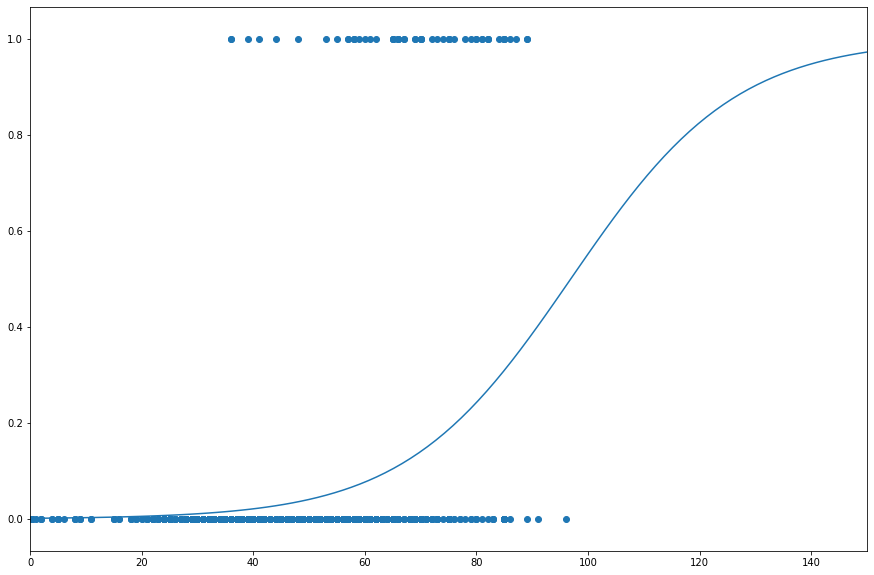

In [6]:
# show logistic regression

a=model.intercept_[0]
b=model.coef_[0,0]
a,b

def logistic_function(x):
    return(1/(1+np.exp(-(a+b*x))))

xplot = np.linspace(0,150,100)
yplot = logistic_function(xplot)

plt.plot(xplot, yplot)
plt.scatter(x_val,death_list)
plt.xlim(0,150)
plt.gcf().set_size_inches(15,10)

# Monday, July 27, 2020

# Continue

In [7]:
# Returns the probability of the sample for each class in the model
probabilities = model.predict_proba(x_test)[:,1]

FPR, TPR, THRESHOLD = roc_curve(y_test, probabilities)

# note: predict vs predict_proba
#          Predict will give either 0 or 1 as output
#          Predict_proba will give the only probability of 1.

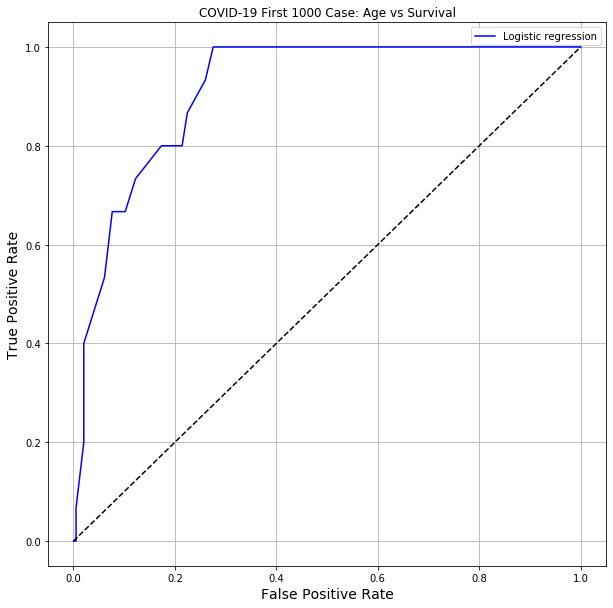

In [8]:
plt.plot(FPR, TPR, c="blue",label="Logistic regression")
plt.plot([0,1],[0,1],c="k",ls="--") # print a diagonal line
plt.grid()
plt.xlabel("False Positive Rate",fontsize=14)
plt.ylabel("True Positive Rate",fontsize=14)
plt.title("COVID-19 First 1000 Case: Age vs Survival")
plt.legend()
plt.gcf().set_size_inches(10,10)

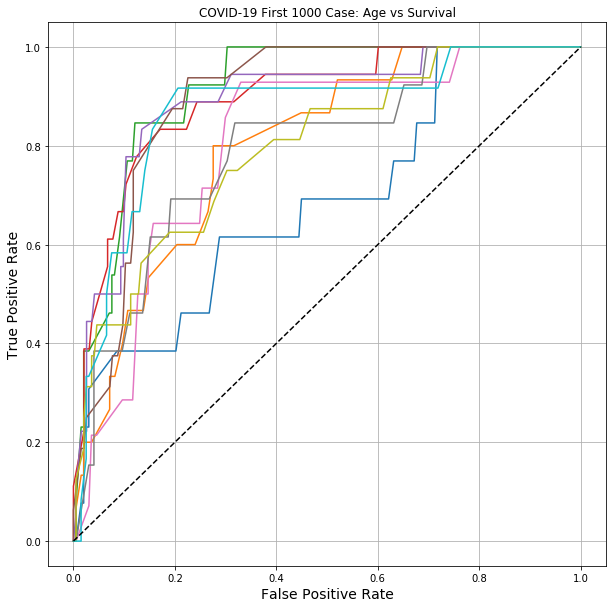

In [9]:
# do 10 tests

accuracy_list = []
for i in range(10):
    
    x_train, x_test, y_train, y_test = train_test_split(x_val, death_list)
    
    model.fit(x_train, y_train)
    
    y_predicted = model.predict(x_test)
    
    accuracy_list.append(accuracy_score(y_test, y_predicted))
    
    probabilities = model.predict_proba(x_test)[:,1]
    
    FPR, TPR, THRESHOLD = roc_curve(y_test, probabilities)
    
    plt.plot(FPR, TPR)

plt.plot([0,1],[0,1],c="k",ls="--") # print a diagonal line
plt.grid()
plt.xlabel("False Positive Rate",fontsize=14)
plt.ylabel("True Positive Rate",fontsize=14)
plt.title("COVID-19 First 1000 Case: Age vs Survival")
plt.gcf().set_size_inches(10,10)


In [10]:
accuracy_list # 10 accuracy values recieved after test/train

[0.9383886255924171,
 0.9241706161137441,
 0.933649289099526,
 0.9146919431279621,
 0.9146919431279621,
 0.9241706161137441,
 0.9289099526066351,
 0.933649289099526,
 0.9241706161137441,
 0.9383886255924171]

In [11]:
print("Accuracy 75/25 Test/Train:", np.mean(accuracy_list))

Accuracy 75/25 Test/Train: 0.9274881516587676


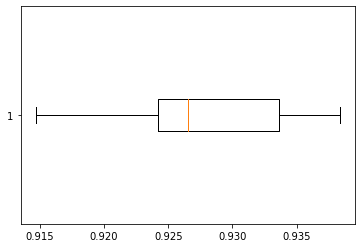

In [12]:
plt.boxplot(accuracy_list,vert=False);

In [13]:
# Leave one out cross validation (use 10 splits (?))


LR = LogisticRegression()
LOO = LeaveOneOut()
LOO_scores = CVS(LR, x_val, death_list, cv=LeaveOneOut(), scoring="accuracy")
print(len(x_val)) # length of data array
print(len(LOO_scores)) # length of data collected array. each run has either 1 or 0, as test one value per run
print(LOO_scores[:20],"...")
accuracy_LOO = np.mean(LOO_scores)
print("\n\nAccuracy Leave one out cross validation:", accuracy_LOO)

843
843
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] ...


Accuracy Leave one out cross validation: 0.930011862396204


K-Fold Method 1 Accuracy: 0.93 

K-Fold Method 2 Accuracy: 0.9276330532212885


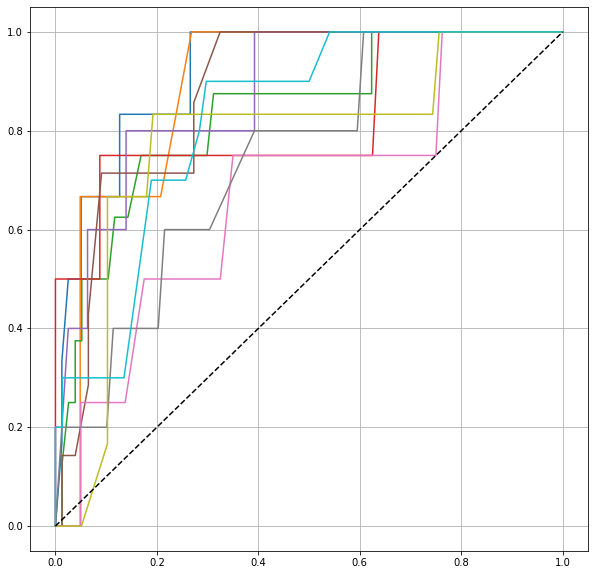

In [28]:
# K-F old splits (use 10 splits)

# method 1

kfold = KFold(n_splits=10, shuffle=True)

accuracy_kfold = []

for train_idx, test_idx in kfold.split(x_val):
    
    LR = LogisticRegression() 
    
    x_train = x_val[train_idx]
    x_test = x_val[test_idx]
    y_train = death_list[train_idx]
    y_test = death_list[test_idx]
    
    LR.fit(x_train, y_train) # Train
    
    y_pred = LR.predict(x_test) # Predict
    
    accuracy_kfold.append(accuracy_score(y_test, y_pred)) # list of accuracies
    
    probabilities = model.predict_proba(x_test)[:,1]
    FPR, TPR, THRESHOLD = roc_curve(y_test, probabilities)
    plt.plot(FPR, TPR)

plt.plot([0,1],[0,1],c="k",ls="--") # print a diagonal line
plt.grid()
plt.gcf().set_size_inches(10,10)
    
print("K-Fold Method 1 Accuracy:", np.mean(accuracy_kfold),"\n")




# method 2

LR = LogisticRegression()
KFOLD_scores = CVS(LR, x_val, death_list, cv=10, scoring="accuracy")

accuracy_kfold_2 = np.mean(KFOLD_scores)
print("K-Fold Method 2 Accuracy:", accuracy_kfold_2)